In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Reading and Cleaning the Data

In [ ]:
df = pd.read_csv('MorphData2.csv')
df = df.dropna()

In [ ]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
for x in df.index:
    if not is_number(df.loc[x,"morph_type"]):
         df.drop(x, inplace = True)
df['morph_type'] = df['morph_type'].astype(float)

In [ ]:
print(df)

      otype morph_type
33      Sy2         Sa
44      Sy1         Sa
47      Sy1         Sa
49      Sy2       S0/a
55      Sy1         Sb
...     ...        ...
41944   Sy2       Sa-b
41983   Sy2       Sa-b
42155   Sy2         S0
42776   Sy2       Sa-b
42975   Sy2         S0

[466 rows x 2 columns]


# 2) Converting Classification of Morphology Type

In [ ]:
for i in range(len(df.index)):
    if df.iat[i,1] >= -6 and df.iat[i,1] <= -3.5 :
        df.iat[i, 1] = 'E'
    elif df.iat[i, 1] > -3.5 and df.iat[i, 1] <= -0.5:
        df.iat[i, 1] = 'S0'
    elif df.iat[i, 1] > -0.5 and df.iat[i, 1] <= 0.5:
        df.iat[i, 1] = 'S0/a'
    elif df.iat[i, 1] > 0.5 and df.iat[i, 1] <= 1.5:
        df.iat[i, 1] = 'Sa'
    elif df.iat[i, 1] > 1.5 and df.iat[i, 1] <= 2.5:
        df.iat[i, 1] = 'Sa-b'
    elif df.iat[i, 1] > 2.5 and df.iat[i, 1] <= 3.5:
        df.iat[i, 1] = 'Sb'
    elif df.iat[i, 1] > 3.5 and df.iat[i, 1] <= 4.5:
        df.iat[i, 1] = 'Sb-c'
    elif df.iat[i, 1] > 4.5 and df.iat[i, 1] <= 7.5:
        df.iat[i, 1] = 'Sc'
    elif df.iat[i, 1] > 7.5 and df.iat[i, 1] <= 8.5:
        df.iat[i, 1] = 'Sc-Irr'
    elif df.iat[i, 1] > 8.5 and df.iat[i, 1] <= 10.5:
        df.iat[i, 1] = 'Irr'

In [ ]:
arr1 = []
arr2 = []
#df = df.drop(['oid','morph_qual'], axis = 1)

#arr_to_check = ['E0', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'S0', 'Sa', 'Sb', 'Sc', 'SBa', 'SBb', 'SBc', 'Irr']
arr_to_check = ['E', 'S0',  'S0/a', 'Sa', 'Sa-b', 'Sb', 'Sb-c', 'Sc', 'Sc-Irr', 'Irr']
#morph= []
#for i, row in df.iterrows():
    #if ((row['morph_type']) in arr_to_check):
        #morph.append(row['morph_type'])
#new_Sy2 = df[df['otype']=="Sy2"]
#print(new_Sy2)
for i in arr_to_check:
    new_Sy1 = df[df['otype']=="Sy1"]
#     print(len(new_Sy1))
#     print(len(new_Sy2))
    new_Sy1 = new_Sy1[new_Sy1['morph_type'] == i]
    #print(new_Sy1)
    if not new_Sy1.empty:
        for i, row in new_Sy1.iterrows():
            arr1.append(row['morph_type'])

for i in arr_to_check:
    new_Sy2 = df[df['otype']=="Sy2"]
    new_Sy2 = new_Sy2[new_Sy2['morph_type'] == i]
    #print(new_Sy2)
    if not new_Sy2.empty:
        for i, row in new_Sy2.iterrows():
            arr2.append(row['morph_type'])


#print(len(arr2) + len(arr1))
#print(arr2)
#print(df.value_counts(['otype', 'morph']))
#bottom label for each bar
#morph = convert(morph)


# 3) Checking quantaties of each morph type

In [ ]:

"""
check_Sy1_dict = {
    'E0': 0,
    'E1': 0,
    'E2': 0,
    'E3': 0,
    'E4': 0,
    'E5': 0,
    'E6': 0,
    'E7': 0,
    'S0': 0,
    'Sa': 0,
    'Sb': 0,
    'Sc': 0,
    'SBa': 0,
    'SBb': 0,
    'SBc': 0,
    'Irr': 0
}
"""
check_Sy1_dict = {'E': 0, 'S0': 0,  'S0/a': 0, 'Sa': 0, 'Sa-b': 0, 'Sb': 0, 'Sb-c': 0, 'Sc': 0, 'Sc-Irr': 0, 'Irr': 0}

#new_Sy1_dict = {'Early Type': 0, 'Late Type': 0}

for i in arr1:
    check_Sy1_dict[i] += 1
"""
check_Sy2_dict = {
    'E0': 0,
    'E1': 0,
    'E2': 0,
    'E3': 0,
    'E4': 0,
    'E5': 0,
    'E6': 0,
    'E7': 0,
    'S0': 0,
    'Sa': 0,
    'Sb': 0,
    'Sc': 0,
    'SBa': 0,
    'SBb': 0,
    'SBc': 0,
    'Irr': 0
}
"""
check_Sy2_dict = {'E': 0, 'S0': 0,  'S0/a': 0, 'Sa': 0, 'Sa-b': 0, 'Sb': 0, 'Sb-c': 0, 'Sc': 0, 'Sc-Irr': 0, 'Irr': 0}
#new_Sy2_dict = {'Early Type': 0, 'Late Type': 0}
for j in arr2:
    check_Sy2_dict[j] += 1

# 4) Setting up graph and plotting

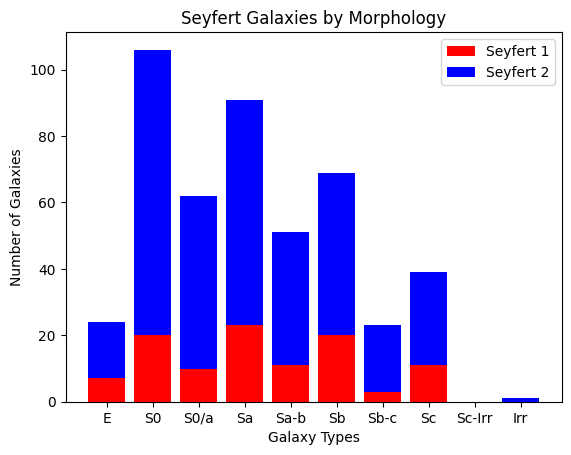

In [ ]:
#x =  ['E0', 'E1','E2','E3', 'E4', 'E5', 'E6', 'E7', 'S0', 'Sa', 'Sb', 'Sc', 'SBa', 'SBb', 'SBc', 'Irr']
#x = ['Early Type', 'Late Type']
x = ['E', 'S0',  'S0/a', 'Sa', 'Sa-b', 'Sb', 'Sb-c', 'Sc', 'Sc-Irr', 'Irr']
Sey1 = []
Sey2 = []

#print(check_Sy1_dict)
#print(check_Sy2_dict)

for i in x:
    Sey1.append(check_Sy1_dict[i])
    Sey2.append(check_Sy2_dict[i])

y1 = np.array(Sey1)
y2 = np.array(Sey2)

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Galaxy Types")
plt.ylabel("Number of Galaxies")
plt.legend(["Seyfert 1", "Seyfert 2"])
plt.title("Seyfert Galaxies by Morphology")
plt.show()
#sumd=0
#for i in range(len(y1)):
    #sumd+=sum(y1[i])+sum(y2[i])
#print(sumd)